# Brief Example with Step by Step Procedure

This notebook serves as the main execution script (user interface, brief version) for battery data analysis, including data import, processing, and visualization. It integrates multiple functions to analyze voltage vs capacity, state of health, and other key metrics into one main function by calling every analysis functions. The details of every functions will be demonstrated on a seperate notebook.

## Part 1A (Essential): Importing Required Libraries

Load the necessary libraries for data processing, visualization, and mathematical operations.

In [1]:
# Importing specific functions from other modules
from DA_Function.DA00_Function_Import_Main_df import (DA00_Function_Import,DA00_Function_df_Cycle_Grouping)
from DA_Function.DA01_Function_VnIvsTime import (DA01_Function_VnIvsTime,DA01_Function_Power)
from DA_Function.DA02_Function_VvsCap import (DA02_Function_VvsCap)
from DA_Function.DA03_Function_Coulombic_Efficiency import (DA03_Function_Coulombic_Efficiency)
from DA_Function.DA04_Function_SOH import (DA04_Function_SOH)
from DA_Function.DA06_Function_dQdV import (DA06_Function_dQdV)

## Part 1B (Essential): User Input and Data Import & Preprocessing Function Execution

Load the battery data from the specified folder and perform initial grouping by cycles.

In [2]:
#----------------------------------Data input----------------------------------
data_folder = 'DA_Data'                                                        # <=== Insert folder of the data file(s)
result_folder = 'DA_Result'                                                    # <=== Insert folder for result
file_names = ['N1T1', 'N2T2']                                                  # <=== Insert file name
rated_capacity = 2100                                                          # <=== Insert rated capacity of battery


for file_name in file_names:
    print(f"Processing file: {file_name}")
#---------------------------------Data Import----------------------------------
    df_main = DA00_Function_Import(data_folder,file_name,rated_capacity)

# ----------------------------Data Grouping by Cycle----------------------------
    # Grouping based on cycle, combining CC Chg & CV Chg into one Chg data
    df_cycle_grouped,df_VQ_grouped = DA00_Function_df_Cycle_Grouping(df_main,
                                                                   result_folder,
                                                                   file_name)

Processing file: N1T1
File DA_Data/N1T1/N1T1__7.txt not found. Stopping.
Folder 'DA_Result/N1T1' created!
The cycles imported from N1T1 are: dict_keys([1, 2, 3, 4, 5]) and pre-processed.
DataFrame df_cycle_grouped preview: 
        Cycle ID  Step ID Step Name  Record ID  Voltage  Current  Capacity  \
0              1        1      Rest          1   3.5639     0.00      0.00   
1              1        1      Rest          2   3.5639     0.00      0.00   
2              1        1      Rest          3   3.5639     0.00      0.00   
3              1        1      Rest          4   3.5639     0.00      0.00   
4              1        1      Rest          5   3.5639     0.00      0.00   
73122          2        7    CC_Chg      73123   3.1420   419.89      0.00   
73123          2        7    CC_Chg      73124   3.1420   419.89      0.01   
73124          2        7    CC_Chg      73125   3.1482   419.95      0.06   
73125          2        7    CC_Chg      73126   3.1522   420.01      0.12

c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA00_Function_Import_Main_df.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accumulated_Capacity'] = df['Capacity'] + start_capacity
c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA00_Function_Import_Main_df.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accumulated_Capacity'] = df['Capacity'] + start_capacity
c:\Users\hanst\OneDrive - University of Twente\Deskt

DataFrame df_VQ_grouped preview: 
   Cycle_1_VChg  Cycle_1_CapChg  Cycle_1_dQdVChg  Cycle_1_VDChg  \
0        3.6055            0.00             0.00         4.1372   
1        3.6055            0.01             0.00         4.1372   
2        3.6064            0.06            51.85         4.1369   
3        3.6070            0.12            97.23         4.1359   
4        3.6077            0.17            83.33         4.1356   

   Cycle_1_CapDChg  Cycle_1_dQdVDChg  Cycle_2_VChg  Cycle_2_CapChg  \
0             0.00              0.00        3.1420            0.00   
1             0.01              0.00        3.1420            0.01   
2             0.06           -155.56        3.1482            0.06   
3             0.12            -58.34        3.1522            0.12   
4             0.17           -194.44        3.1547            0.17   

   Cycle_2_dQdVChg  Cycle_2_VDChg  Cycle_2_CapDChg  Cycle_2_dQdVDChg  \
0             0.00         4.1378             0.00              0.00  

c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA00_Function_Import_Main_df.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accumulated_Capacity'] = df['Capacity'] + start_capacity
c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA00_Function_Import_Main_df.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Accumulated_Capacity'] = df['Capacity'] + start_capacity
c:\Users\hanst\OneDrive - University of Twente\Deskt

DataFrame df_VQ_grouped preview: 
   Cycle_1_VChg  Cycle_1_CapChg  Cycle_1_dQdVChg  Cycle_1_VDChg  \
0        3.6055            0.00             0.00         4.1372   
1        3.6055            0.01             0.00         4.1372   
2        3.6064            0.06            51.85         4.1369   
3        3.6070            0.12            97.23         4.1359   
4        3.6077            0.17            83.33         4.1356   

   Cycle_1_CapDChg  Cycle_1_dQdVDChg  Cycle_2_VChg  Cycle_2_CapChg  \
0             0.00              0.00        3.1420            0.00   
1             0.01              0.00        3.1420            0.01   
2             0.06           -155.56        3.1482            0.06   
3             0.12            -58.34        3.1522            0.12   
4             0.17           -194.44        3.1547            0.17   

   Cycle_2_dQdVChg  Cycle_2_VDChg  Cycle_2_CapDChg  Cycle_2_dQdVDChg  \
0             0.00         4.1378             0.00              0.00  

## Part 2 (Selective):  Plotting, Calculating, Processing, Analysis

All the functions that lead to plotting, calculating, processing, and analysis of degradation analysis with the metrics, such as Voltage to Capacity and dQ/dV analysis, however those functions are not related to each other and could be done independently and without order.

### Voltage and Current vs Time Analysis [Direct Plotting]
Analyze the voltage and current vs time relationship across charge-discharge cycles.

c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA01_Function_VnIvsTime.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  host.legend(loc='upper left')
c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA01_Function_VnIvsTime.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  par1.legend(loc='upper right')


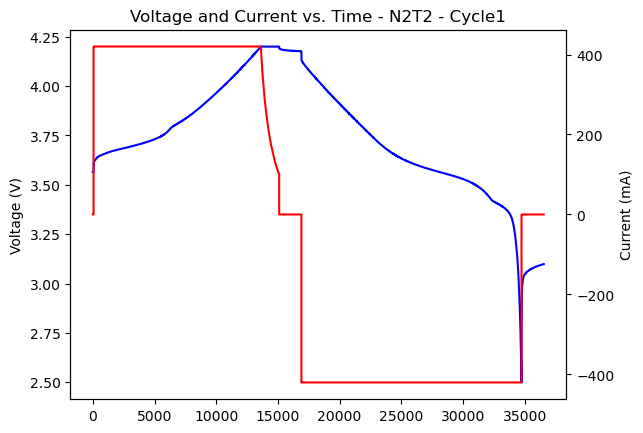

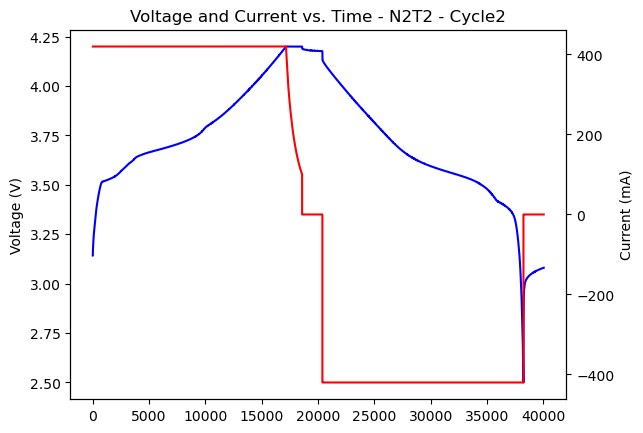

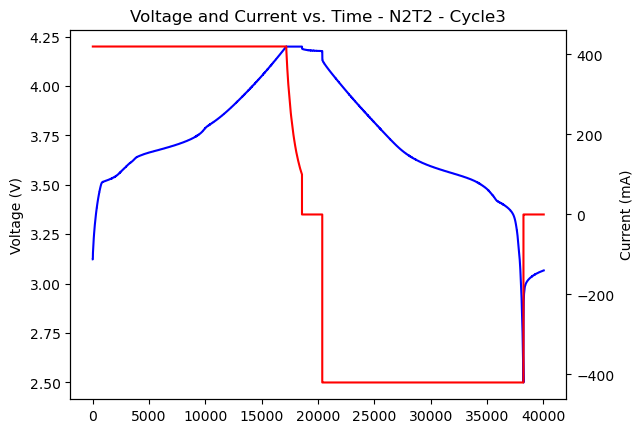

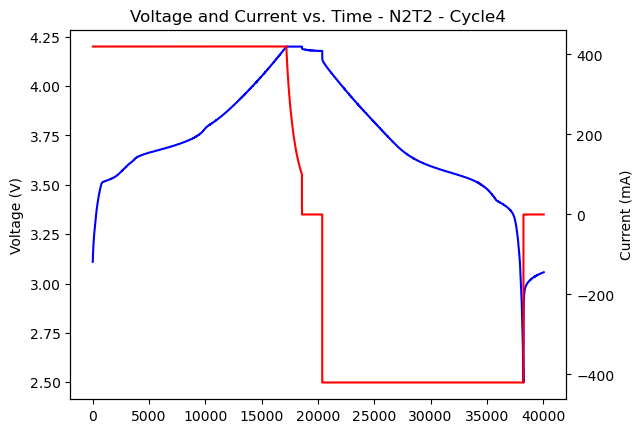

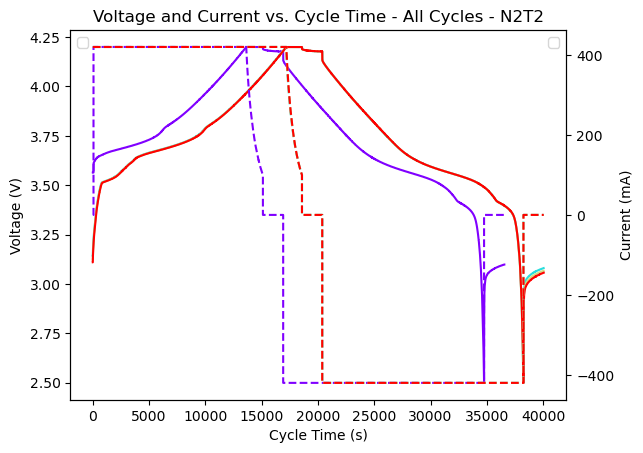

In [3]:
    DA01_Function_VnIvsTime(result_folder,file_name,df_cycle_grouped)

### Power Analysis [Direct Plotting]

Analyze the power vs time relationship across charge-discharge cycles.

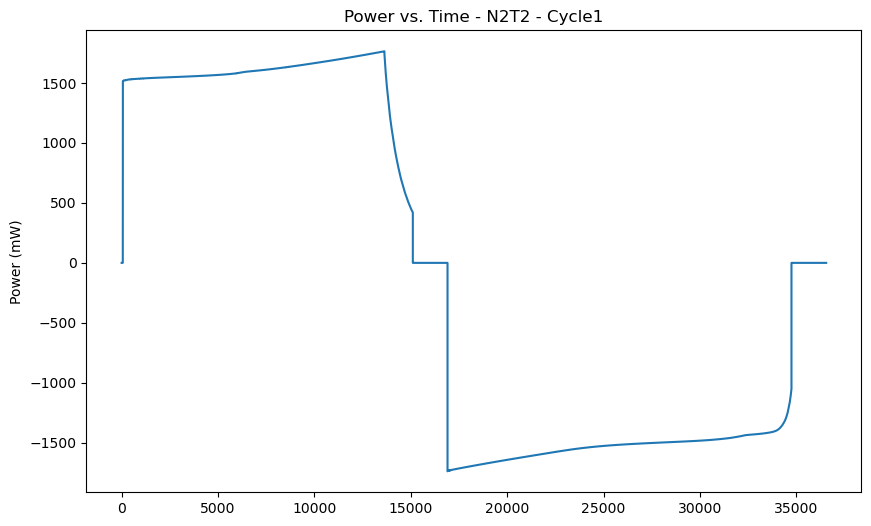

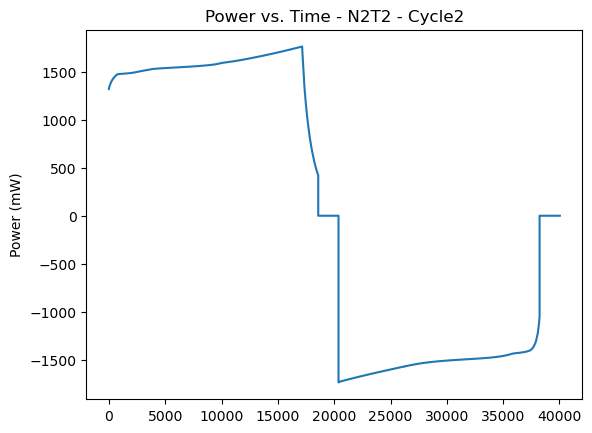

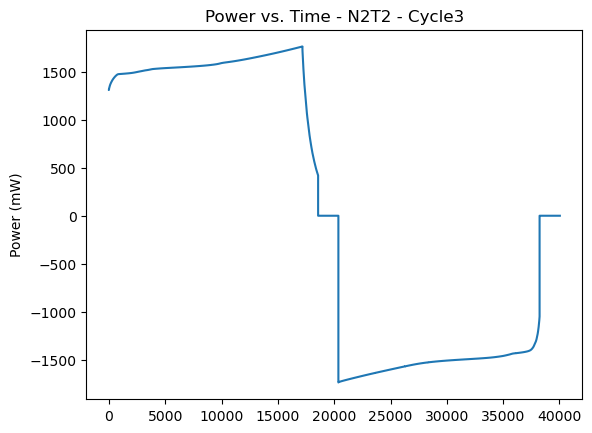

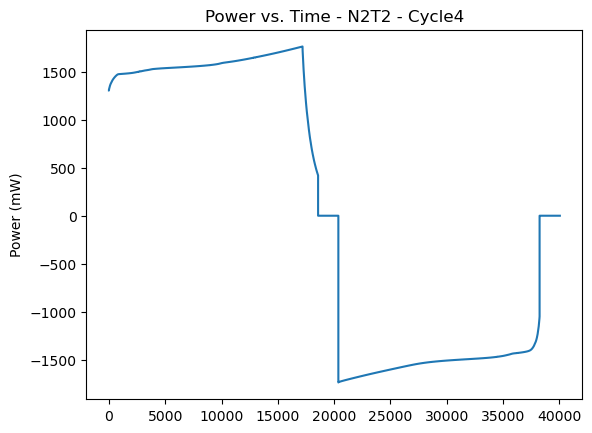

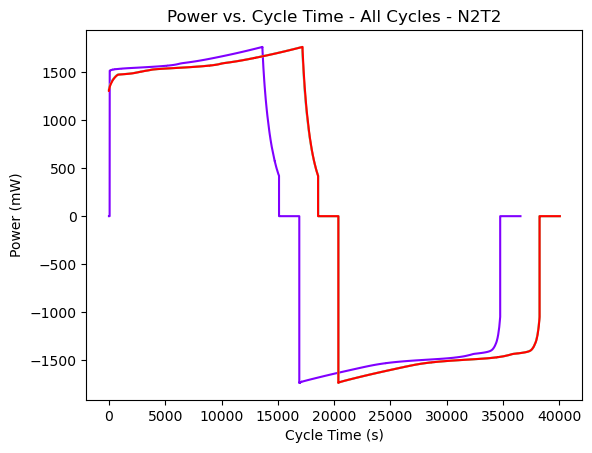

In [4]:
    DA01_Function_Power(result_folder,file_name,df_cycle_grouped)

### Voltage vs Capacity Analysis [Direct Plotting]

Analyze the voltage vs capacity relationship across charge-discharge cycles.

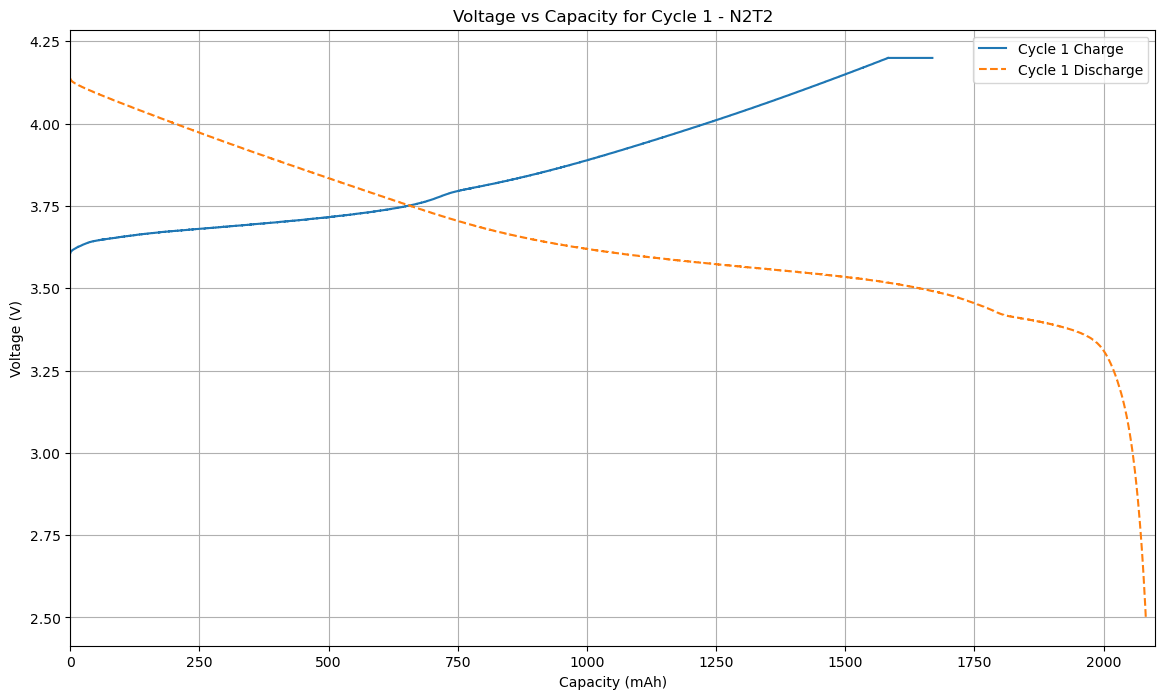

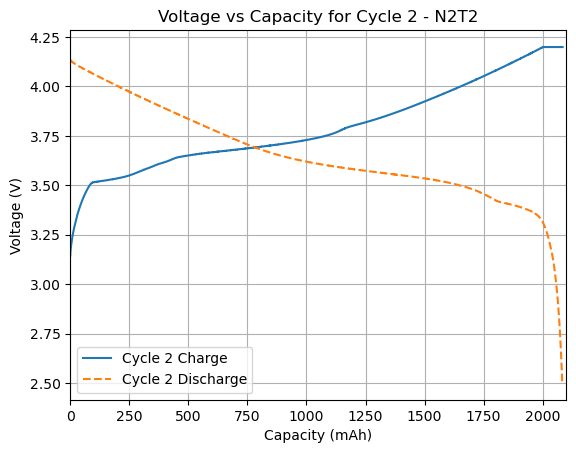

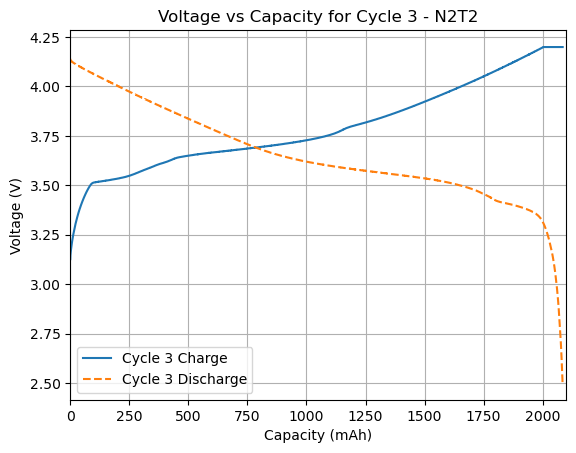

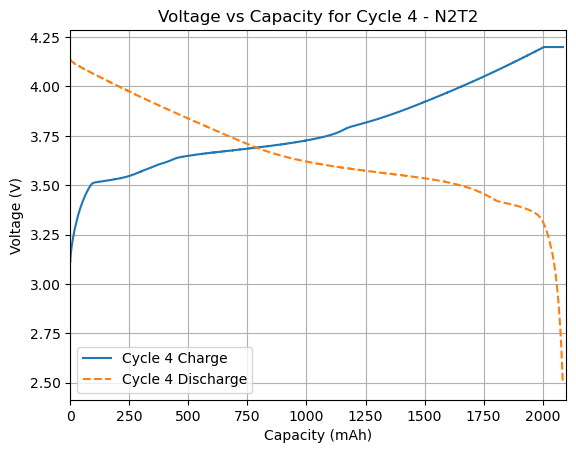

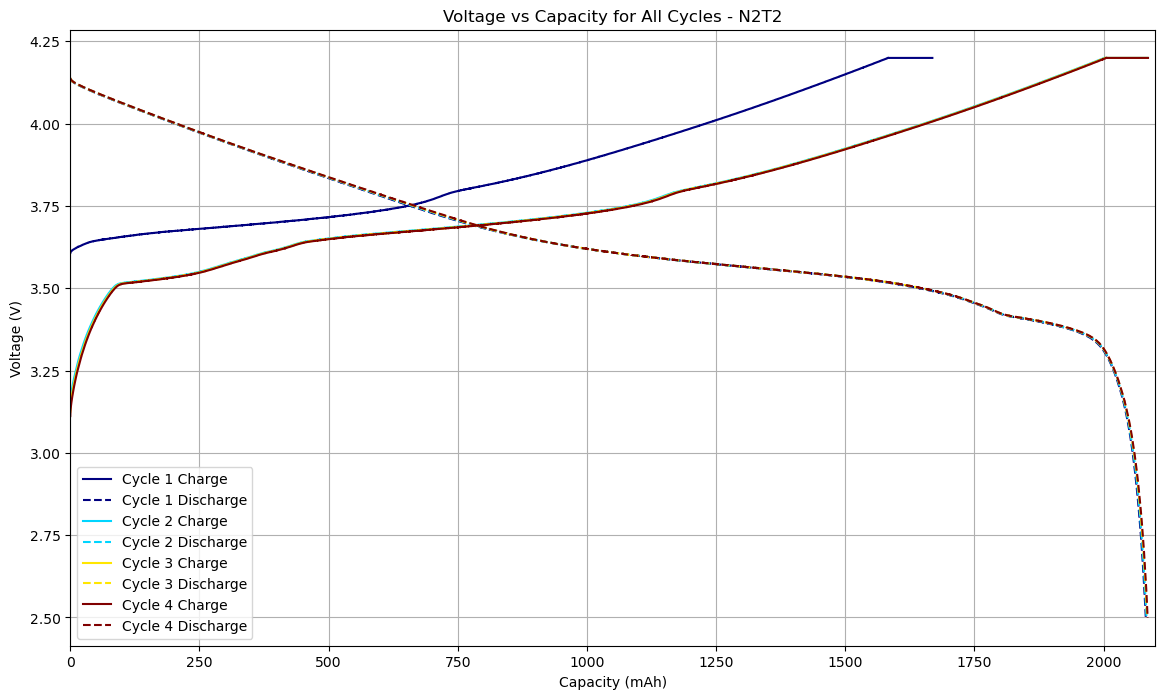

In [5]:
    DA02_Function_VvsCap(df_VQ_grouped,file_name,result_folder,rated_capacity)

### Coulombic Efficiency (CE) Analysis [Processing & Plotting]

Calculate and visualize the coulombic efficiency of the battery over cycles.

DataFrame df_ce preview: 
   Cycle_ID  Discharge_Capacity  Charge_Capacity  Coulombic_Efficiency
0         2             2082.97          2084.35             99.933792
1         3             2084.21          2084.74             99.974577
2         4             2085.16          2085.93             99.963086


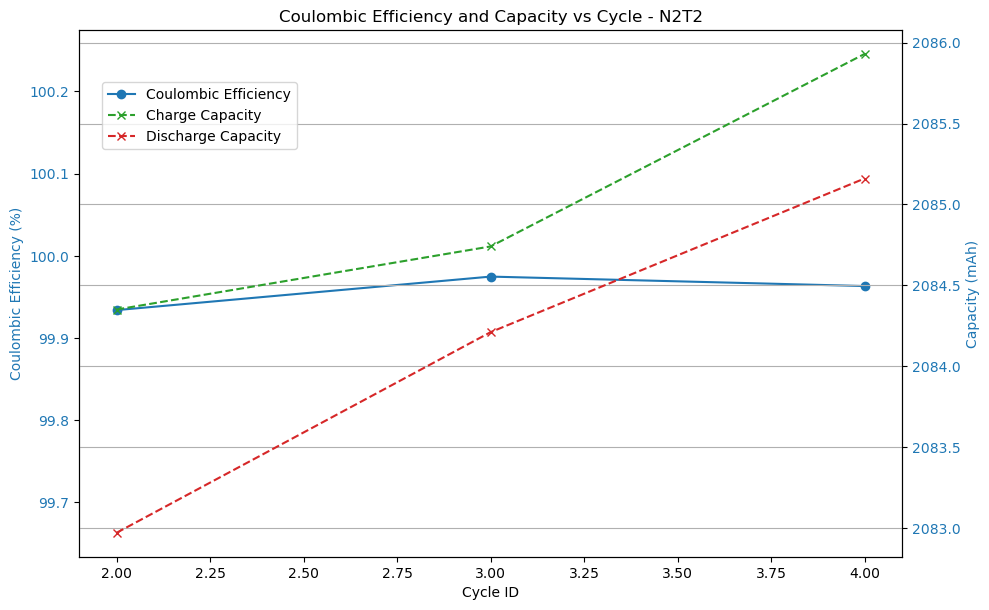

In [6]:
    df_ce = DA03_Function_Coulombic_Efficiency(df_VQ_grouped,file_name,result_folder)

### State of Health (SOH) Analysis [Processing & Plotting]

Calculate and visualize the state of health of the battery over cycles.

DataFrame df_SOH preview: 
   Cycle_ID  Maximum_Capacity        SOH
0         1           2081.65  99.126190
1         2           2084.35  99.254762
2         3           2084.74  99.273333
3         4           2085.93  99.330000


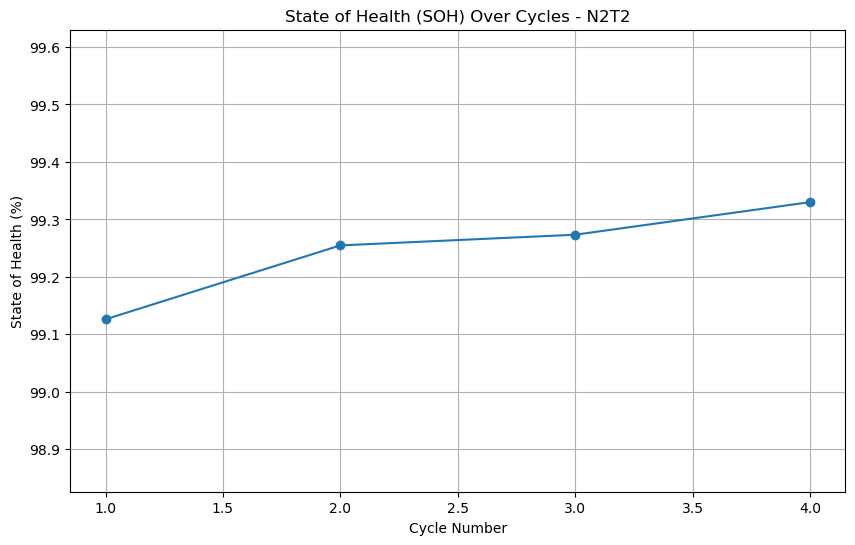

In [7]:
    df_SOH = DA04_Function_SOH(df_VQ_grouped,rated_capacity,file_name,result_folder)

### dQ/dV Analysis [Processing, Analysis, Plotting]

Perform dQ/dV analysis to study capacity degradation trends.

c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA06_Function_dQdV.py:83: RuntimeWarning: divide by zero encountered in divide
  dQdV_chg_ori = np.diff(capchg) / np.diff(vchg)
c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA06_Function_dQdV.py:105: RuntimeWarning: divide by zero encountered in divide
  dQdV_dchg_ori = np.diff(capdchg) / np.diff(vdchg)


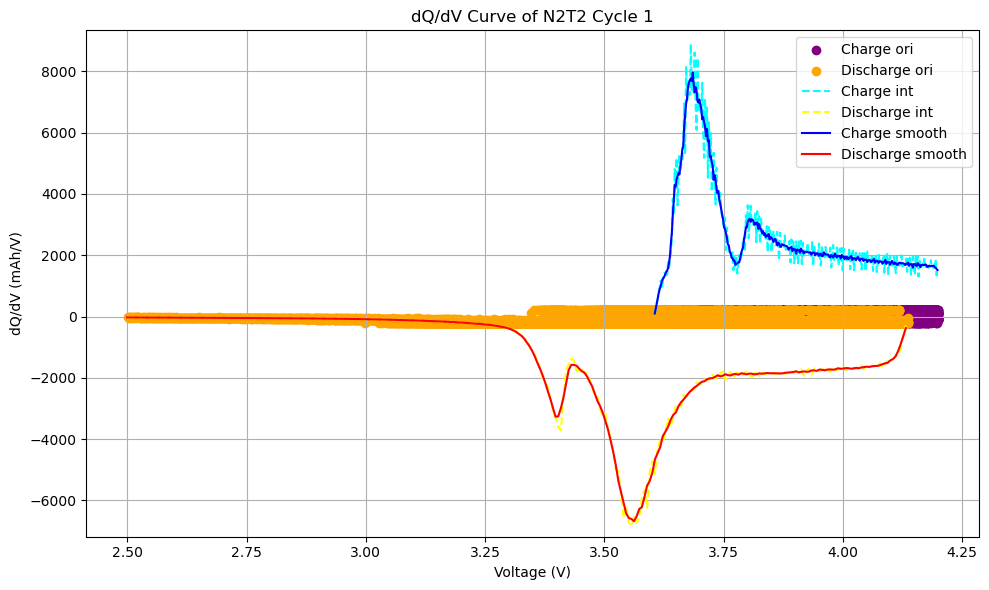

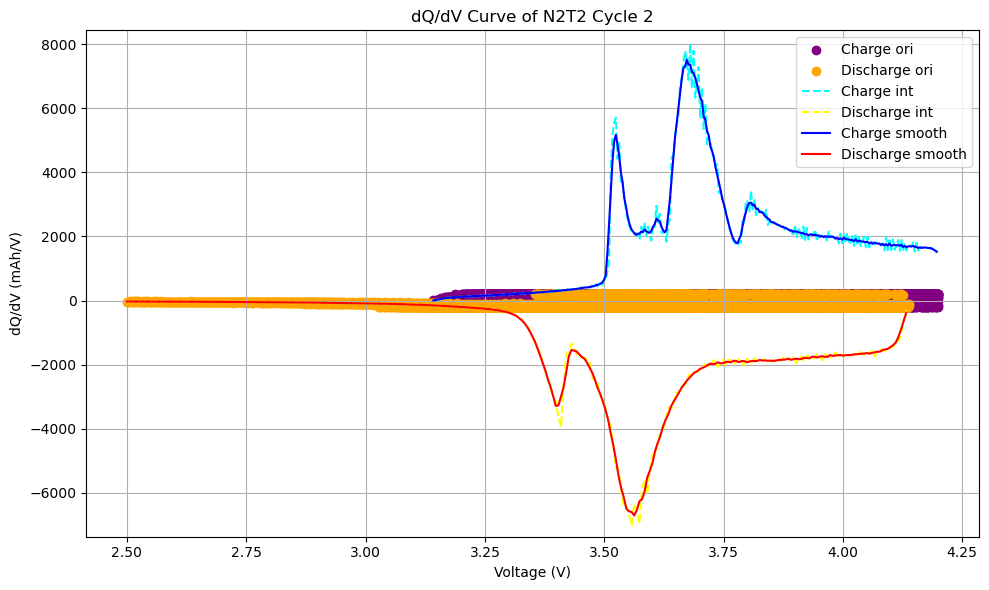

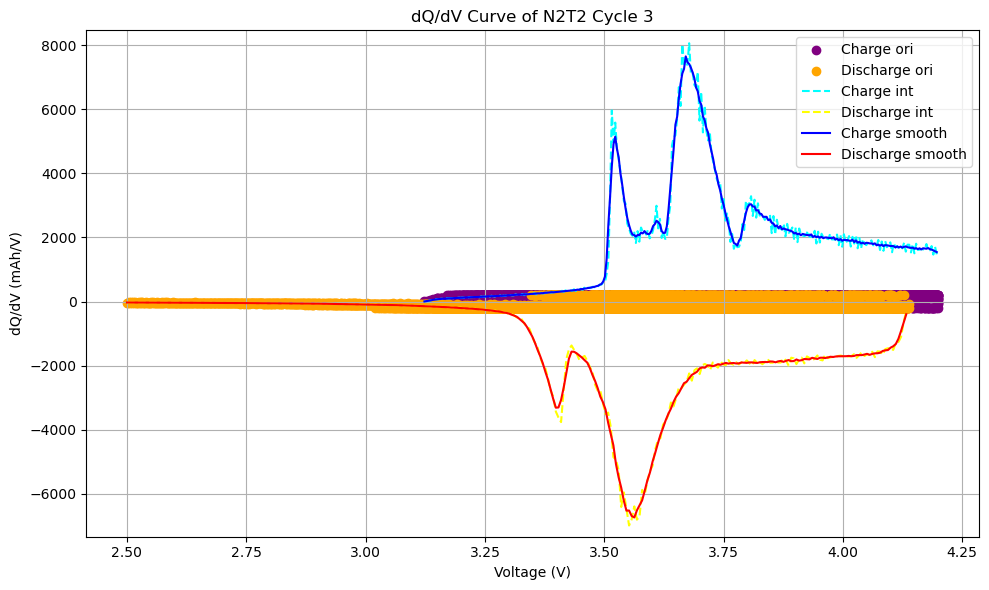

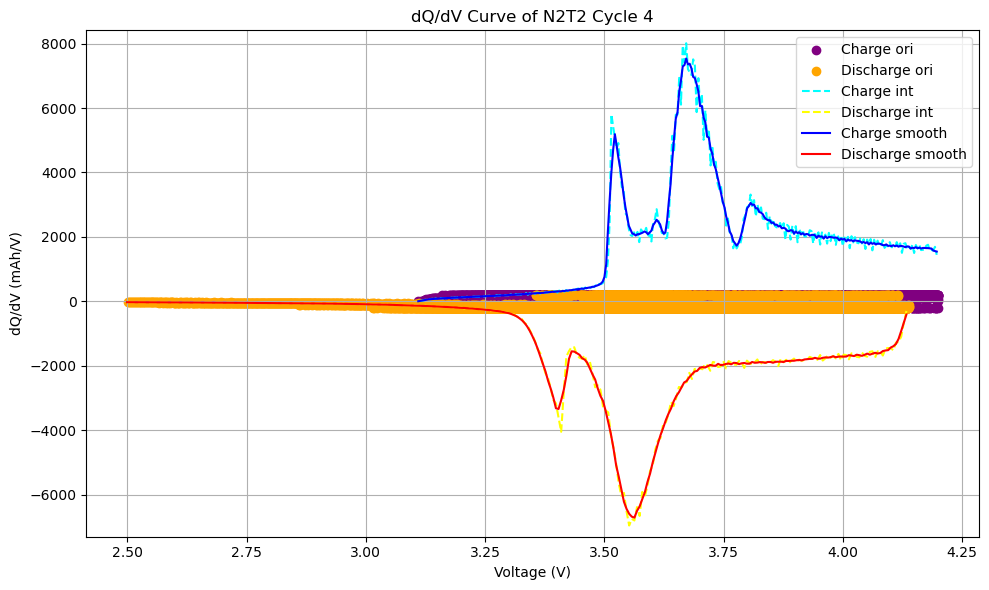

dQ/dV data saved successfully to DA_Result/N2T2/df_dQdV_N2T2.csv
DataFrame df_dqdv preview: 
   Cycle_1_VChg  Cycle_1_dQdVChg_Smooth  Cycle_1_VDChg  \
0      3.605500               99.441321       2.499300   
1      3.607489              252.231592       2.504778   
2      3.609477              405.021863       2.510256   
3      3.611466              567.935066       2.515734   
4      3.613455              746.104945       2.521212   

   Cycle_1_dQdVDChg_Smooth  Cycle_2_VChg  Cycle_2_dQdVChg_Smooth  \
0               -28.917960      3.142000                2.188525   
1               -29.847791      3.145539               11.998423   
2               -30.777622      3.149078               21.808321   
3               -31.282851      3.152616               31.101711   
4               -31.882824      3.156155               43.231705   

   Cycle_2_VDChg  Cycle_2_dQdVDChg_Smooth  Cycle_3_VChg  \
0       2.500000               -30.286762      3.123100   
1       2.505478               

c:\Users\hanst\OneDrive - University of Twente\Desktop\DA_Publish_Offline\DA_Function\DA06_Function_dQdV.py:190: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


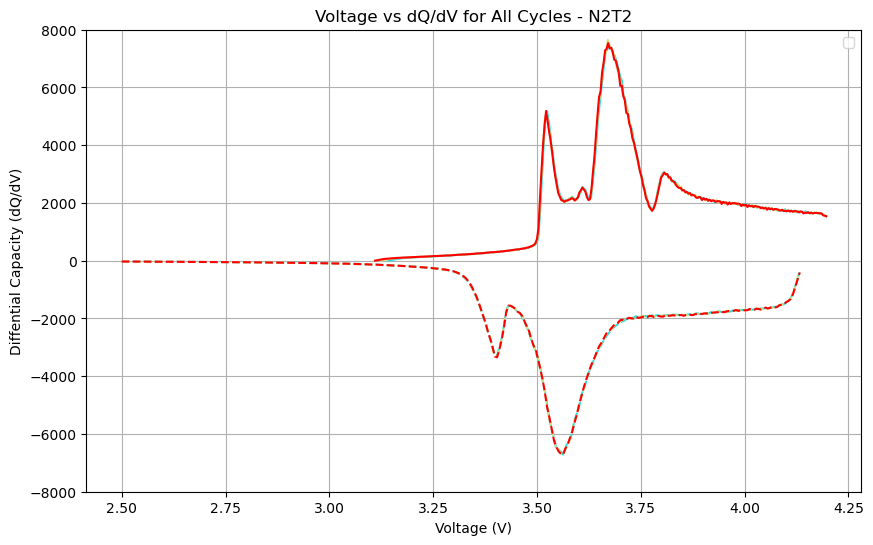

0        99.441321
1       252.231592
2       405.021863
3       567.935066
4       746.104945
          ...     
294    1659.697275
295    1608.896737
296    1594.497141
297    1554.256643
298    1514.016145
Name: Cycle_1_dQdVChg_Smooth, Length: 299, dtype: float64
Iteration 0: len(Chg_peak_indices) = 0, height_range = 50, prominence_range = 50
Detected more than 2 peaks; increasing thresholds
Iteration 1: len(Chg_peak_indices) = 52, height_range = 60, prominence_range = 60
Detected more than 2 peaks; increasing thresholds
Iteration 2: len(Chg_peak_indices) = 46, height_range = 70, prominence_range = 70
Detected more than 2 peaks; increasing thresholds
Iteration 3: len(Chg_peak_indices) = 36, height_range = 80, prominence_range = 80
Detected more than 2 peaks; increasing thresholds
Iteration 4: len(Chg_peak_indices) = 28, height_range = 90, prominence_range = 90
Detected more than 2 peaks; increasing thresholds
Iteration 5: len(Chg_peak_indices) = 21, height_range = 100, prominence_ra

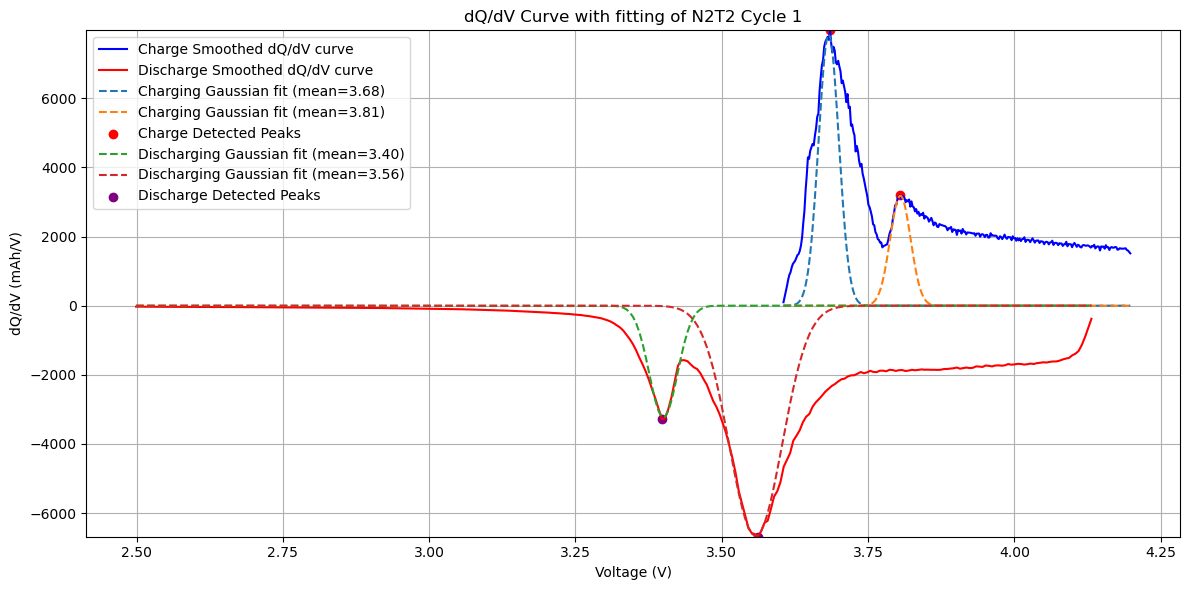

0         2.188525
1        11.998423
2        21.808321
3        31.101711
4        43.231705
          ...     
294    1635.516492
295    1625.732917
296    1593.694358
297    1560.185238
298    1526.676118
Name: Cycle_2_dQdVChg_Smooth, Length: 299, dtype: float64
Iteration 0: len(Chg_peak_indices) = 0, height_range = 50, prominence_range = 50
Detected more than 2 peaks; increasing thresholds
Iteration 1: len(Chg_peak_indices) = 8, height_range = 60, prominence_range = 60
Detected more than 2 peaks; increasing thresholds
Iteration 2: len(Chg_peak_indices) = 7, height_range = 70, prominence_range = 70
Detected more than 2 peaks; increasing thresholds
Iteration 3: len(Chg_peak_indices) = 5, height_range = 80, prominence_range = 80
Detected more than 2 peaks; increasing thresholds
Iteration 4: len(Chg_peak_indices) = 5, height_range = 90, prominence_range = 90
Detected more than 2 peaks; increasing thresholds
Iteration 5: len(Chg_peak_indices) = 5, height_range = 100, prominence_range =

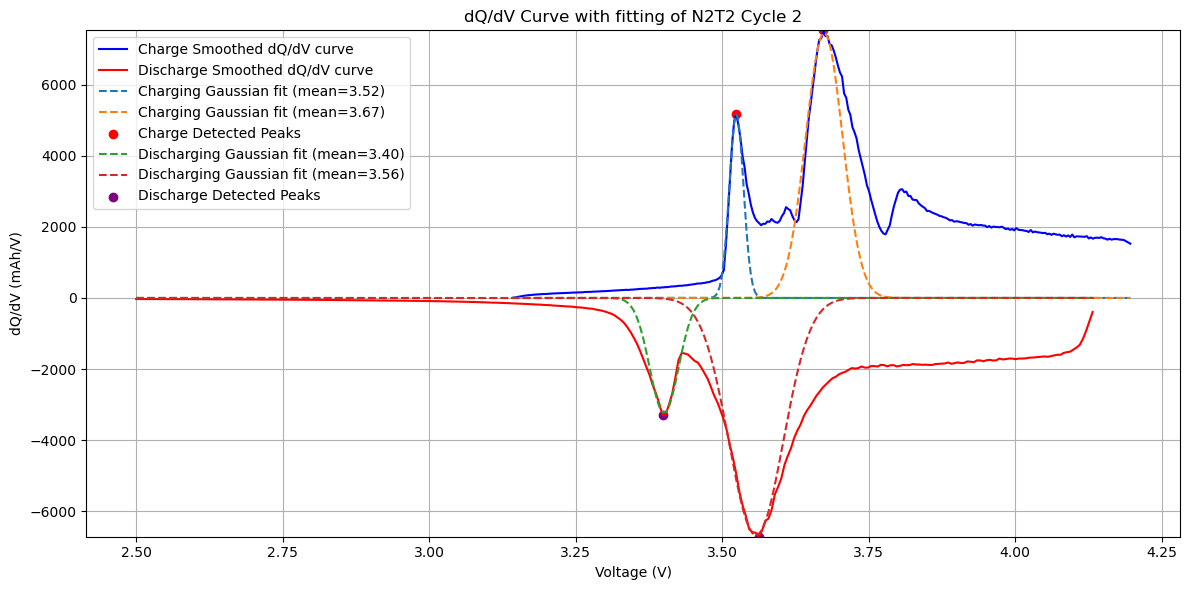

0         3.504277
1        12.038118
2        20.571959
3        30.624794
4        40.732497
          ...     
294    1635.655215
295    1619.363045
296    1596.388115
297    1569.555710
298    1542.723305
Name: Cycle_3_dQdVChg_Smooth, Length: 299, dtype: float64
Iteration 0: len(Chg_peak_indices) = 0, height_range = 50, prominence_range = 50
Detected more than 2 peaks; increasing thresholds
Iteration 1: len(Chg_peak_indices) = 7, height_range = 60, prominence_range = 60
Detected more than 2 peaks; increasing thresholds
Iteration 2: len(Chg_peak_indices) = 6, height_range = 70, prominence_range = 70
Detected more than 2 peaks; increasing thresholds
Iteration 3: len(Chg_peak_indices) = 5, height_range = 80, prominence_range = 80
Detected more than 2 peaks; increasing thresholds
Iteration 4: len(Chg_peak_indices) = 5, height_range = 90, prominence_range = 90
Detected more than 2 peaks; increasing thresholds
Iteration 5: len(Chg_peak_indices) = 5, height_range = 100, prominence_range =

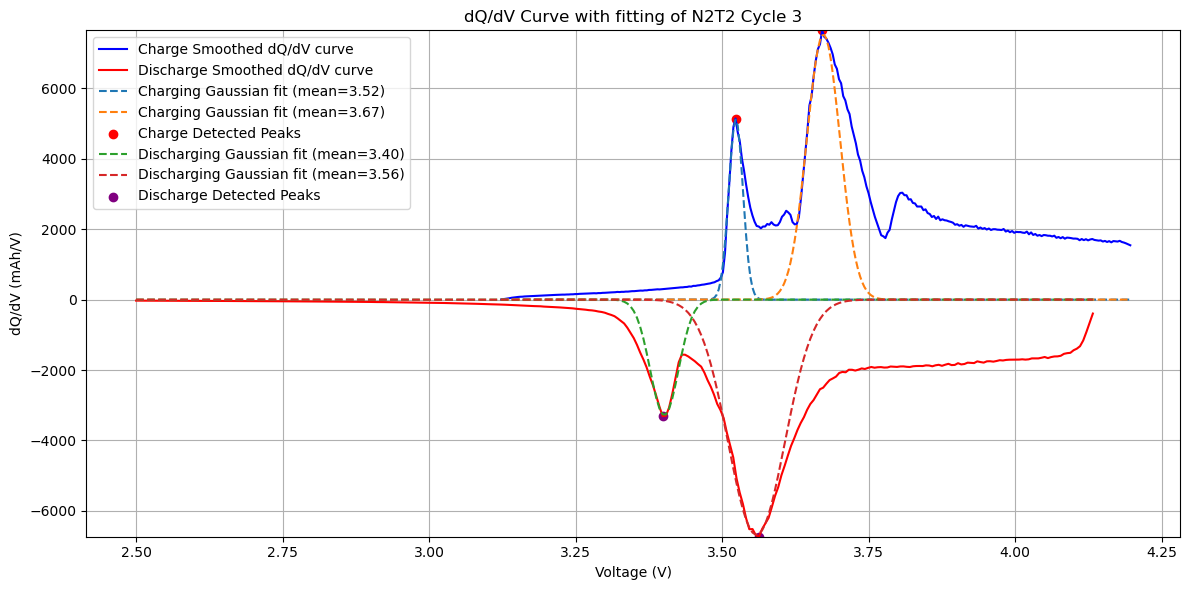

0         2.458408
1        12.619435
2        22.780463
3        31.401252
4        42.267365
          ...     
294    1644.668440
295    1637.547464
296    1574.843621
297    1559.390076
298    1543.936531
Name: Cycle_4_dQdVChg_Smooth, Length: 299, dtype: float64
Iteration 0: len(Chg_peak_indices) = 0, height_range = 50, prominence_range = 50
Detected more than 2 peaks; increasing thresholds
Iteration 1: len(Chg_peak_indices) = 11, height_range = 60, prominence_range = 60
Detected more than 2 peaks; increasing thresholds
Iteration 2: len(Chg_peak_indices) = 9, height_range = 70, prominence_range = 70
Detected more than 2 peaks; increasing thresholds
Iteration 3: len(Chg_peak_indices) = 6, height_range = 80, prominence_range = 80
Detected more than 2 peaks; increasing thresholds
Iteration 4: len(Chg_peak_indices) = 5, height_range = 90, prominence_range = 90
Detected more than 2 peaks; increasing thresholds
Iteration 5: len(Chg_peak_indices) = 4, height_range = 100, prominence_range 

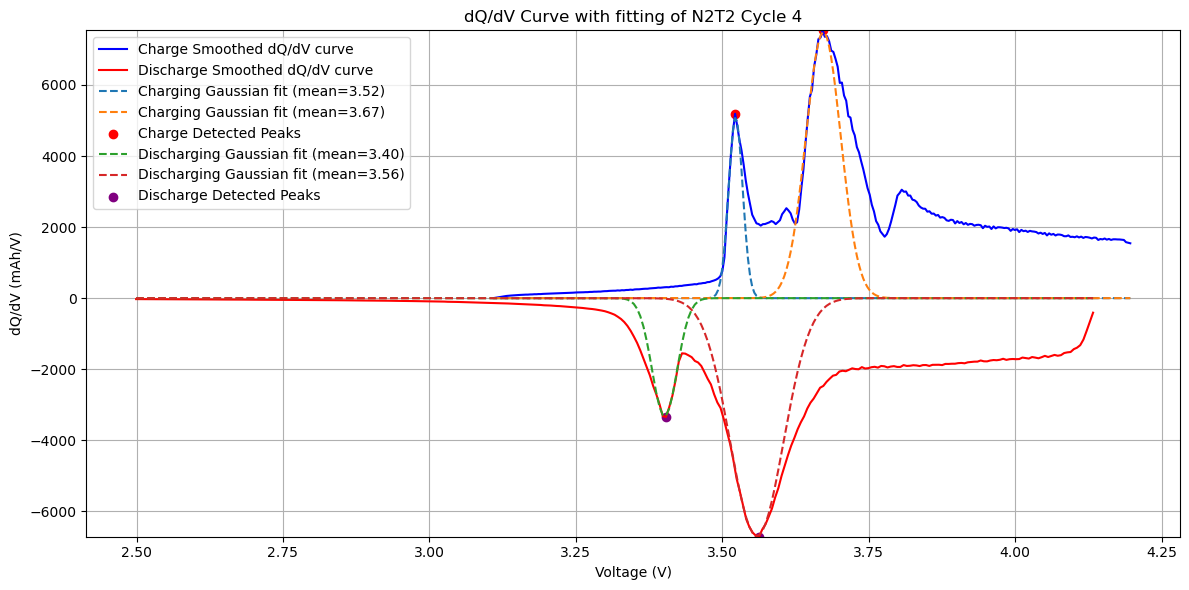

Peaks data saved successfully to DA_Result/N2T2/df_peaks_N2T2.csv
DataFrame df_peaks preview: 
   Voltage_Charge_Peaks_Cycle_1  dQdV_Charge_Peaks_Cycle_1  \
0                      3.685045                7962.293979   
1                      3.804363                3187.874201   

   Voltage_DisCharge_Peaks_Cycle_1  dQdV_DisCharge_Peaks_Cycle_1  \
0                         3.397680                  -3271.615687   
1                         3.562018                  -6681.505586   

   Overvoltage_Peaks_Cycle_1  Voltage_Charge_Peaks_Cycle_2  \
0                   0.287365                      3.524190   
1                   0.242345                      3.672819   

   dQdV_Charge_Peaks_Cycle_2  Voltage_DisCharge_Peaks_Cycle_2  \
0                5169.811927                         3.398325   
1                7522.899537                         3.562653   

   dQdV_DisCharge_Peaks_Cycle_2  Overvoltage_Peaks_Cycle_2  \
0                  -3289.690642                   0.125865   
1     

In [8]:
    # Interpolation setup
    interpolation_points = 300                                               # <=== Insert data point numbers for interpolation

    # Smoothing setup             [Setup for Savitzky–Golay filter smoothing]
    window_length = 5                                                        # <=== Insert the window length as the smoothing properties
    polyorder = 1                                                            # <=== Insert the polyorder as the smoothing properties

    # Finding peaks             [Setup parameter for finding peaks on dQ/dV-V plot]
    min_prominence = 50                       #[Do not change if not necessary] <=== Insert the minimum prominence value
    min_height = 50                           #[Do not change if not necessary] <=== Insert the minimum height value
    max_prominence = 10000                    #[Do not change if not necessary] <=== Insert the maximum prominence value
    max_height = 10000                        #[Do not change if not necessary] <=== Insert the maximum height value
    prominence_step = 10                      #[Do not change if not necessary] <=== Insert the prominence value per iteration 
    height_step = 10                          #[Do not change if not necessary] <=== Insert the height value per iteration            
    max_iterations = 1000                     #[Do not change if not necessary] <=== Insert the maximum iteration number
    max_peaks = 2                             #[Do not change if not necessary] <=== Insert the maximum expected peaks
    
    window_size = 3                               #[Do not change if not necessary] <=== Insert the window size for gaussian fitting       

    # Selecting parameters shown on plot
    show_on_plot = [                                                           # <=== Insert the parameters to be shown on the plot: 
                    # 'data'                                                    #      - 'data':from neware;
                    'ori',                                                     #      - 'ori':pure calculation; 
                    'int',                                                     #      - 'int':interpolated data; 
                    'smooth',                                                  #      - 'smooth':interpolation,then filtering/smoothing  
                                                                               #         with Savitzky-Golay filter; 
                    'peaks-fitting'                                            #      - 'peaks-fitting':notate peaks and plot Gaussian 
                                                                               #         fitting curve on the plot             
                    ]
    
    df_dqdv,df_peaks,df_fitting = DA06_Function_dQdV(file_name,df_VQ_grouped,
                                                     show_on_plot,
                                                     interpolation_points,
                                                     window_length,polyorder,
                                                     window_size,min_prominence,
                                                     min_height,max_prominence,
                                                     max_height,prominence_step,
                                                     height_step,max_iterations,
                                                     max_peaks,result_folder)